# Gráfico que muestre el porcentaje de partidas finalizadas según género.
Primero importo las librerias necesarias para obtener la estadistica y abro los archivos

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import json

#Abro los eventos
ruta = os.path.join(os.getcwd(), '..', 'src', 'datos', 'eventos_partidas.csv')
data_set = pd.read_csv(ruta, encoding='utf-8')

#Abro los perfiles
with open(os.path.join(os.getcwd(), "..", "src", "datos", "perfiles.json"), "r", encoding='utf-8') as perfiles:
    jugadores = json.load(perfiles)

Obtengo los usuarios y los eventos en los que finalizaron la partida. Convierto el json de perfiles a dataframe y combinamos los dataframes para tener el genero en la misma estructura

In [2]:
#Obtengo los eventos finalizados por usuario
data_set = data_set[["evento","estado", "usuarie"]]
data_set = data_set[data_set["evento"] == "fin"]

df_usuarios = pd.DataFrame.from_dict(jugadores)
df_usuarios = df_usuarios.rename(columns = {'nick':'usuarie'})


nuevo_df = pd.merge(data_set,df_usuarios,on="usuarie")

  evento      estado  usuarie  edad  genero
0    fin   cancelada  hombre2    20  Hombre
1    fin  finalizado  hombre2    20  Hombre
2    fin  finalizado    anita    20   Mujer
3    fin  finalizado    anita    20   Mujer
4    fin  finalizado    anita    20   Mujer


Conseguimos los 5 generos con mas partidas finalizadas e iteramos para hacer distintos graficos. Aca tuvimos un punto de vista diferente sobre lo que nos pedia el enunciado, por lo tanto hay 6 graficos. Los primeros 5 son partidas canceladas y finalizadas por genero. El ultimo es el porcentaje de finalizadas para los 5 generos, comparandolos.

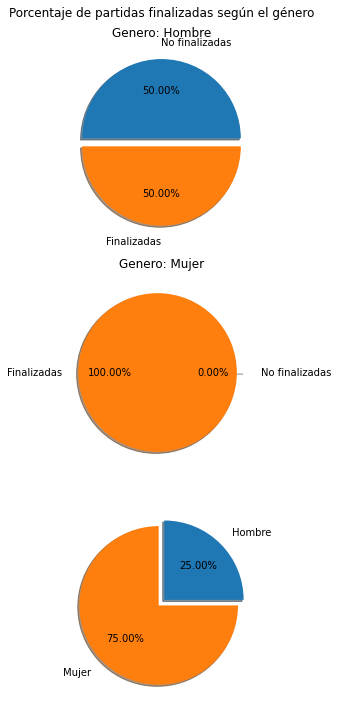

In [4]:
por_genero = nuevo_df.groupby(["genero", "estado"])["genero"].size()
etiquetas = ["No finalizadas","Finalizadas"] 

generos = nuevo_df["genero"].unique()

if len(generos) > 5: cant_graficos = 6
else: cant_graficos = len(generos) + 1

figure, axis = plt.subplots(nrows=cant_graficos, ncols=1, figsize=(10, 10))

grafico = 0
finalizadas = []
for genero in generos:
    cantidades = list(por_genero[genero])
    if not 'cancelada' in por_genero[genero].keys():
        cantidades.insert(0, 0)
    if not 'finalizado' in por_genero[genero].keys():
        cantidades.insert(1, 0)
    finalizadas.append(por_genero[genero]["finalizado"])
    axis[grafico].pie(cantidades,explode = (0.05, 0.05), labeldistance=1.2, labels=etiquetas, autopct='%1.2f%%', shadow=True)
    
    axis[grafico].set_title('Genero: '+ genero) 
    grafico += 1
axis[grafico].pie(finalizadas,explode = (0.05, 0.05), labeldistance=1.2, labels=list(generos), autopct='%1.2f%%', shadow=True)

figure.suptitle('Porcentaje de partidas finalizadas según el género')
figure.tight_layout()
plt.show()